# Arrays and Plotting
In this chapter, we will learn to visualize mathematical functions and the results of
mathematical calculations. You have probably used a variety of different
plotting tools in the past, and we will now do much of the same thing in Python.
The way standard plotting tools work in Python is that we first compute a
number of points lying on the curve we want to show and then draw straight
lines between them. If we have enough points, the result looks
like a smooth curve. For plotting mathematical functions, this approach
can seem a bit primitive, since there are other tools we can use to simply
type in a mathematical expression and have the curve plotted on the screen.
However, the approach we use here is also much more flexible, since we can plot
data when there is no underlying mathematical function, for instance, experimental
data read from a file or results from a numerical experiment. To plot
functions in Python, we need to learn about the package `matplotlib`, which is an
extensive toolbox for plotting and visualization.
In addition, it is useful to introduce the package
named NumPy, which is useful for storing storing *arrays* of data for efficient
computations.


# NumPy and Array Computing
The standard way to plot a curve $y=f(x)$ is to draw straight lines between
points along the curve, and for this purpose we need to store the coordinates of the points.
We could use lists for this, for instance, two lists `x` and `y`, and most of the plotting tools
we will use work fine with lists. However, a data structure known as an *array* is much more
efficient than a list, and it offers a number of nice features and advantages. Computing
with arrays is often referred to as *array computations* or *vectorized computations*, and these concepts
are useful for much more than just plotting curves.

### Arrays are generalizations of vectors.

In high school mathematics, vectors were introduced as line segments with a
direction, represented by coordinates $(x,y)$ in the plane or $(x,y,z)$ in space.
This concept of vectors can be generalized to any number of dimensions,
and we can view a vector $v$ as a general $n$-tuple of numbers;
$v=(v_0,\ldots,v_{n-1})$. In Python, we could use
a list to represent such a vector, by storing component $v_i$ as
element `v[i]` in the list. However, vectors are so useful and common in
scientific programming that a special data structure has been created for them:
the *NumPy array*. An array is much less flexible than a list, in that it
has a fixed length (i.e., no `append`-method), and one array can only hold
variables of the same type. However, arrays are also much more efficient to use in
computations, and since they are designed for such use, they have a
number of useful features that can shorten and clarify our code.

For the purpose of plotting, we will mostly use one-dimensional arrays, but an
array can have multiple indices,
similar to a nested list. For instance, a two-dimensional array $A_{i,j}$ can
be viewed as a table of numbers,
with one index for the row and one for the column, as follows:

$$
\left\lbrack\begin{array}{cccc}
0 & 7 & -3 & 5\\
-1 & -3 & 4 & 0\\
9 & 3 & 5 & -7
\end{array}\right\rbrack
\hspace{1cm}
A =
\left\lbrack\begin{array}{ccc}
A_{0,0} & \cdots &  A_{0,n-1}\\
\vdots & \ddots &  \vdots\\
A_{m-1,0} & \cdots & A_{m-1,n-1}
\end{array}\right\rbrack
$$

Such a two-dimensional case is similar to a matrix in linear algebra, but
NumPy arrays do not follow the standard rules
for mathematical operations on matrices. The number of indices in an array is often
referred to as the *rank* or the *number of dimensions*.

### Storing (x,y) points on a curve in lists and arrays.

To make the array concept a bit more concrete, we consider the task mentioned above, where we
want to store points on a function curve $y=f(x)$. All the plotting cases we will
consider are based on this idea, so it makes sense to introduce
it for a simple example. We have seen in previous chapters that there are multiple
ways to store such pairs of numbers, for instance in a nested list containing $(x,y)$ pairs.
However, for the purpose of plotting, the easiest approach is to create two lists or arrays,
one holding the $x$-values and another holding the $y$-values.
The two lists/arrays should be of equal length, and we will always create them
using the same two steps. First, we create
$n$ uniformly spaced $x$-values that cover the interval where we want to plot
the function. Then, we run through these numbers and compute the
corresponding $y$-values, storing these in a separate list or array.
The following interactive session illustrates the procedure, using list comprehensions to
first create a list of five $x$-points on the
interval $[0,1]$, and then compute the corresponding points $y=f(x)$ for
$f(x) = x^2$.

In [1]:
def f(x):
    return x**2

Now that we have the two lists, they can be sent directly to a tool such as
`matplotlib` for plotting, but before
we do this, we will introduce NumPy arrays. If we continue the interactive session
from above, the following lines will turn the two lists into NumPy arrays:

It is worth noting how we import NumPy in the first line. As always, we
could import it with `from numpy import *`, but this is a bad habit, since `numpy`
and `math` contain many functions with the same name, and we will often use
both modules in the same program. To ensure that we always know which module we
are using, it is a good habit to import NumPy as we have done here. Using
`import numpy as np` instead of simply `import numpy` saves us some
typing in the rest of the code and is also more or less an accepted standard
among Python programmers.

Converting lists to arrays using the `array` function from NumPy is intuitive
and flexible, but NumPy has a number of built-in functions that are often more
convenient to use. Two of the most widely used ones are called `linspace`
and `zeros`.  The following interactive session is a list-free version of the
example above, where we create
the NumPy arrays directly, using these two functions:

In [2]:
import numpy as np
def f(x):
    return x**2

In [3]:
n = 5                     # number of points
x = np.linspace(0, 1, n)  # n points in [0, 1]
y = np.zeros(n)           # n zeros (float data type)
for i in range(n):
    y[i] = f(x[i])

As illustrated here, we will usually call `linspace` with three arguments, with
the general form `linspace(start,stop,n)`, which will create an array of
length `n`, containing uniformly distributed values on the interval from
`start` to `stop`. If we leave out the third argument, as in `linspace(start,stop)`,
a default value of `n=50` is used. The `start` and `stop` arguments must always
be provided. An array of equally spaced $x$-values is needed nearly every time
we plot something, so we will use `linspace` frequently. It is
worth spending time to become familiar with how it is used and what it returns.

The second NumPy function used above, `zeros(n)`, does exactly what we would
expect: it creates an array of length `n` containing only zeros. We have seen
earlier that a common way to create a list is to start with an empty list
and fill it with values using a for loop and the `append`-method. We will often
use a similar approach to create an array, but since an array has fixed length
and no `append`-method, we must first create an array of the right size and
then loop over it with an index to fill in the values. This operation is very common, so
remembering the existence of NumPy's `zeros` function is important.

As we have seen in Chapter 3, lists in Python are extremely flexible, and can contain
any Python object. Arrays are much more static, and we will typically use them
for numbers (i.e., type `float` or `int`). They can also be of other types,
such as boolean arrays (true/false), but a single array always contains a
single object type. We have also seen that arrays are of fixed length and do not
have the convenient `append`-method. So, why do we use arrays at all?
One reason, which was mentioned above, is that arrays are more efficient to
store in memory and use in computations. The other reason is that arrays can
shortn our code and make it more readable, since we can perform operations on an
entire array at once instead of using loops. Say, for instance, that we want to
compute the cosine of all the elements in a list or array `x`. We know how to do
this using a for loop

In [4]:
import numpy as np
from math import cos
x = np.linspace(0,1,11)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = cos(x[i])

but if `x` is an array, `y` can be computed by

In [5]:
y = np.cos(x)                  # x: array, y: array

In addition to being shorter and quicker to write, this code will run much
faster than the code with the loop.
Such computations are usually referred to as vectorized computations, since
they work on the entire array (or vector) at once. Most of the standard functions
we find in `math` have a corresponding function in
`numpy` that will work for arrays. Under the hood these NumPy functions still
contain a for loop, since they need to
traverse all the elements of the array, but this loop is written in very
efficient C code and is therefore much faster than Python loops we write ourselves.


A function `f(x)` that was written to work a for a single number `x` will
often work well for an array as well. If the function uses only basic mathematical
operators ($+,-,*$, etc.), we can pass it either a number or an array as
the argument, and it will work just fine with no modifications. If the function uses
more advanced operations that we
need to import, we have to make sure to import these from `numpy` rather
than `math`, since the functions in
`math` work only with single numbers. The following example illustrates how it works:

In [6]:
from numpy import sin, exp, linspace

def g(x):
    return x**2+2*x-4

def f(x):
    return sin(x)*exp(-2*x)

x = 1.2                     # float object
y = f(x)                    # y is float

x = linspace(0, 3, 101)   # 100 intervals in [0,3]
y = f(x)                  # y is array
z = g(x)		  # z is array

We see that, except for the initial import from NumPy, the two functions look exactly the same as if they were
written to work on a single number. The result of the two function calls will be two arrays `y,z` of length 101,
with each element being the function value computed for the corresponding value of `x`.

If we try to send an array of length $>1$ to a function imported from `math`,
we will obtain an error message:

In [7]:
import math, numpy
x = numpy.linspace(0, 1, 6)
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [8]:
math.cos(x[0])

1.0

In [9]:
math.cos(x)

TypeError: only size-1 arrays can be converted to Python scalars

In [10]:
numpy.cos(x)

array([1.        , 0.98006658, 0.92106099, 0.82533561, 0.69670671,
       0.54030231])

On the other hand, using NumPy functions on single numbers will work just fine.
A natural question to ask, then, is why do we ever need to import from `math`
at all? Why not  use NumPy functions all
the time, since they do the job for both arrays and numbers? The answer is that
we can certainly do this, and in most cases it will work fine, but the functions
in `math` are more optimized for single numbers (scalars) and are therefore faster.
One will rarely notice the difference, but there can be applications
where the extra efficiency matters. There are also functions in `math`
(e.g., `factorial`) that do not have a corresponding version in NumPy.

We started this chapter by computing points along a curve using lists
and for loops. Now that we have introduced NumPy, we can solve this task
much more easily by using arrays and array computations. Say
we want to compute points on the curve described by the function

$$
f(x) = e^{-x}\sin(2\pi x),\quad x\in [0, 4].
$$

The vectorized code can look as follows:

In [11]:
import numpy as np

n = 100
x = np.linspace(0, 4, n+1)
y = np.exp(-x)*np.sin(2*np.pi*x)

This code is shorter and quicker to write than the one with lists and loops,
most people find it easier to read
since it is closer to the mathematics, and it runs much faster than the list version.

We have already mentioned the term *vectorized computations*, and if you
follow a course in scientific Python you will probably
be asked at some point to *vectorize* a function or a computation. This usually
means nothing more than to
ensure that all the mathematical functions are imported from `numpy` rather
than `math`, and to then perform all the operations on entire arrays rather than looping
over their individual elements. The vectorized code should contain no for loops
written in Python. The mathematical functions `g(x)` and `f(x)` in the example
above are perfectly valid examples of vectorized functions, even though
the actual functions look identical to the scalar versions. The only major
exceptions to this simple recipe for vectorization are functions that
include if-tests. For instance, in Chapter 4, we implemented
piecewise-defined mathematical functions using if-tests. These functions
will not work if the input argument is an array, because a test such as `if x > 0`
has no precise meaning if `x` is an array. There are ways, however, to solve this
problem, which we will look into later in the chapter.

# Plotting Curves with Matplotlib
The motivation for introducing NumPy arrays was to plot mathematical
functions, and now that we have introduced all the necessary tools
we are finally ready to do so. Let us start with a simple example.
Say we want to plot the curve $y(x) = e^{-x}\sin(2\pi x)$, for $x$ ranging
from zero to four. The code can look like

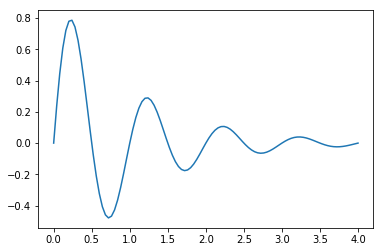

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

n = 100
x = np.linspace(0, 4, n+1)
y = np.exp(-x)*np.sin(2*np.pi*x)

plt.plot(x, y)
plt.show()

This code is identical to the example above, except for the first line and the
last two lines. The first line imports the plotting tools from the `matplotlib`
package, which is an extensive library of functions for scientific visualization.
We will only use a small subset of the capabilities of `matplotlib`, mostly
from the module `pyplot`, to plot curves and create animations of curves that change over time.
The next few lines are from the example above, and they simply create the
two arrays `x` and `y` defining the points along the curve.
The last two lines carry out the actual plotting: the
call `plt.plot(x,y)` first creates the plot of the curve, and then
`plt.show()` displays the plot on the screen. The reason for keeping these
separate is to make it easy to plot multiple curves in a single plot,
by calling `plot` multiple times followed by a single call to `show`. The resulting
plot is shown in [Figure](#fig:plot1a).
A common mistake is to forget the `plt.show()` call, and the program will
then simply end without displaying anything on the screen.

<!-- dom:FIGURE: [./fig-plot/plot1a_pylab.png, width=600 frac=0.8] Simple plot of a function using Matplotlib. <div id="fig:plot1a"></div> -->
<!-- begin figure -->
<div id="fig:plot1a"></div>

<p>Simple plot of a function using Matplotlib.</p>
<img src="./fig-plot/plot1a_pylab.png" width=600>

<!-- end figure -->


The plot produced by the code above is very simple and contains no title,
axis labels, or other information. We can easily add such information in the
plot by using tools from `matplotlib`:

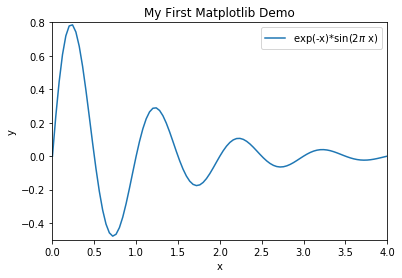

In [13]:
import matplotlib.pyplot as plt  # import and plotting
import numpy as np

def f(x):
    return np.exp(-x)*np.sin(2*np.pi*x)

n = 100
x = np.linspace(0, 4, n+1)
y = f(x)

plt.plot(x, y, label='exp(-x)*sin(2$\pi$ x)')

plt.xlabel('x')               # label on the x axis
plt.ylabel('y')               # label on the y axis
plt.legend()                  # mark the curve
plt.axis([0, 4, -0.5, 0.8])  # [tmin, tmax, ymin, ymax]
plt.title('My First Matplotlib Demo')

plt.savefig('fig.pdf')   # make PDF image for reports
plt.savefig('fig.png')   # make PNG image for web pages
plt.show()

The plot resulting from this code is shown in [Figure](#fig:plot1c).
Most of the lines in the code should be self-explanatory, but some are worth
a comment. The call to `legend` will create a legend for the plot,
using the information provided in the `label` argument passed to `plt.plot`. This is
very useful when plotting multiple curves in a single plot. The `axis`
function sets the length of the
horizontal and vertical axes. These are otherwise set automatically by Matplotlib,
which usually works fine, but in some cases the plot looks better if we set the
axes manually. Later in this chapter, we will create animations of curves and,
in this case, the axes will have to be set to fixed lengths. Finally,
the two calls to `savefig` will save our plot in two different file formats,
automatically determined by the file name provided.

<!-- dom:FIGURE: [./fig-plot/plot1c_pylab.png, width=600 frac=0.9] Example plot with more information added. <div id="fig:plot1c"></div> -->
<!-- begin figure -->
<div id="fig:plot1c"></div>

<p>Example plot with more information added.</p>
<img src="./fig-plot/plot1c_pylab.png" width=600>

<!-- end figure -->



If we plot multiple curves in a single plot, Matplotlib will choose the color of
each curve automatically. This default choice usually
works well, but we can control the look of each curve further if
desired. Say we want to plot the functions $e^{-x}\sin(2\pi x)$
and $e^{-2x}\sin(4\pi x)$
in the same plot:

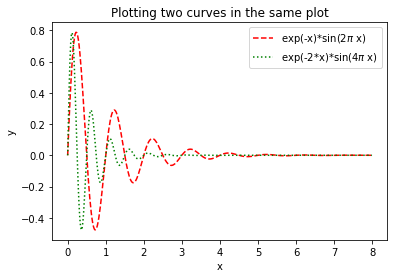

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return np.exp(-x)*np.sin(2*np.pi*x)

def f2(x):
    return np.exp(-2*x)*np.sin(4*np.pi*x)

x = np.linspace(0, 8, 401)
y1 = f1(x)
y2 = f2(x)

plt.plot(x, y1, 'r--', label='exp(-x)*sin(2$\pi$ x)')
plt.plot(x, y2, 'g:', label='exp(-2*x)*sin(4$\pi$ x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Plotting two curves in the same plot')
plt.savefig('fig_two_curves.png')
plt.show()

This example shows that the options for changing the color and plotting style
of the curves are fairly intuitive, and can be easily explored by trial and error.
For a full overview of
all the options, we refer the reader to the Matplotlib documentation.

Although the code example above was not too complex, we had to write an excess
of 20 lines just to plot two simple functions on the screen. This level of
programming is necessary if we want to produce professional-looking plots,
such as in a presentation, master's thesis, or scientific report. However,
if we just want a quick plot on the screen, this can be achieved much more simply.
The following code lines will plot the same two curves as in the
example above, using just three lines:

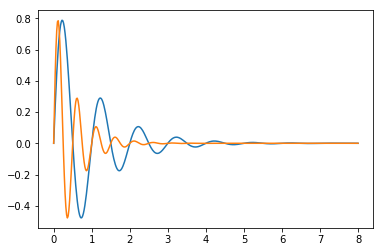

In [15]:
t = np.linspace(0, 8, 201)
plt.plot(x,np.exp(-x)*np.sin(2*np.pi*x),x,np.exp(-2*x)*np.sin(4*np.pi*x))
plt.show()

As always, the effort we put in depends on what the resulting plot will be
used for, and, in particular, on whether we are just exploring some data on our
own or plan on presenting it to others.


### Example: Plotting a user-specified function.

Say we want to write a small program `plotf.py` that
asks the user to provide a mathematical function $f(x)$, and then plots the
curve $y=f(x)$. We can also ask the user to specify the
boundaries of the curve, that is, the lower and upper limits for $x$. An example
of running the program from the terminal can look like
should be

        Terminal> python plot_input.py
        Write a mathematical expression of x:2*x**2-4
        Provide lower bound for x:0
        Provide upper bound for x:7


For these input values the program should plot the curve
$y = 2x^2-4$, for $x\in [0,7]$. The `plot_input.py` program should
work for any mathematical expression. The task can be solved using
the the functions `input` and `eval` introduced in Chapter 5:

```Python
        from numpy import *
        import matplotlib.pyplot as plt
        
        formula = input('Write a mathematical expression of x:')
        xmin = float(input('Provide lower bound for x:'))
        xmax = float(input('Provide upper bound for x:'))
        
        x = linspace(xmin, xmax, 101)
        y = eval(formula)
        
        plt.plot(x, y)
        plt.show()
```

This small program will stop and ask the user first for a mathematical expression
and then for the bounds on `x`, and then it will proceed to plot the resulting curve.
Note that, in this case, we have a good reason to import NumPy with `from numpy import *`.
We want the user to be able type a formula using
standard mathematical terminology, such as `sin(x) + x**2` (rather than `np.sin(x) + x**2`). For this to
work, we need to import all the mathematical functions from NumPy without a prefix.


# Plotting Discontinuous and Piecewise-Defined Functions
Discontinuous functions, and functions defined in a piecewise manner, are common in science and engineering.
We saw in Chapter 4 how these could be implemented in
Python using if-tests, but, as we briefly
commented above, this implementation gives rise to challenges when
using arrays and NumPy. To consider a concrete example, say we want to
plot the Heaviside function, defined by

$$
H(x) = \left\lbrace\begin{array}{ll}
0, & x<0\\
1, & x\geq 0
\end{array}\right.
$$

Following the ideas from Chapter 4, a Python implementation
of this function could look like this

In [16]:
def H(x):
    if x < 0:
        return 0
    else:
        return 1

Now we want to plot the function using the simple approach introduced above.
It is natural to simply create an array of values `x`, and to pass this array to
the function `H(x)` to compute the corresponding $y$-values:

```Python
        x = linspace(-10, 10, 5)  # few points (simple curve)
        y = H(x)
        plot(x, y)
```

However, if we try to run this code, we obtain an error message, a `ValueError`
error inside the function `H(x)`, coming from the `if x < 0` line. We can
illustrate what goes wrong in an interactive Python session:

In [17]:
x = linspace(-10,10,5)
x

array([-10.,  -5.,   0.,   5.,  10.])

In [18]:
b = x < 0
b

array([ True,  True, False, False, False])

In [19]:
bool(b)  # evaluate b in a Boolean context

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We see here that the result of the statement `b = x < 0` is an array of
Boolean values, whereas, if `b` were a single number, the result would be a
single Boolean (true/false). Therefore, the statement `bool(b)`, or
tests such as `if b` or `if x < 0` do not make sense, since it is impossible to
say whether an array of multiple true/false values is true or false.

There are several ways to fix this problem. One is to avoid the vectorization
altogether, and return to the traditional for loop for computing the values:

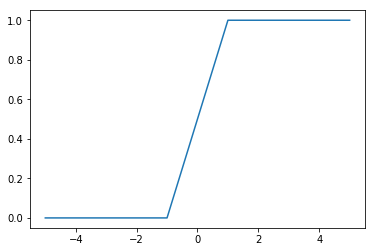

In [20]:
import numpy as np
import matplotlib.pyplot as plt
n = 5
x = np.linspace(-5, 5, n+1)
y = np.zeros(n+1)

for i in range(len(x)):
    y[i] = H(x[i])

plt.plot(x,y)
plt.show()

A variation of the same approach is to alter the `H(x)` function itself
and put the for loop inside it:

In [21]:
def H_loop(x):
    r = np.zeros(len(x))  # or r = x.copy()
    for i in range(len(x)):
        r[i] = H(x[i])
    return r

n = 5
x = np.linspace(-5, 5, n+1)
y = H_loop(x)

We see that this last approach ensures that we can call the function with an array argument `x`, but the
downside to both versions is that we need to write quite a lot of new code, and using  a
for loop is much slower than using vectorized array computing.

An alternative approach is to use a built-sin NumPy function named `vectorize`, which offers automatic
vectorization of functions with if-tests. The line

In [22]:
Hv = np.vectorize(H)

creates a vectorized version `Hv(x)` of the function `H(x)` that will work
with an array argument.
Although this approach is obviously better, in the sense that the conversion
is automatic so we need to write very little new code, it is about as slow as
the two approaches using for loops.


A third approach is to write a new function where the if-test is coded differently:

In [23]:
def Hv(x):
    return np.where(x < 0, 0.0, 1.0)

For this particular case, the NumPy function `where` will evaluate the expression `x<0`
for all elements in the array `x`, and return an array of the same length as `x`,
with values 0.0 for all elements where `x<0`, and 1.0 for the others. More
generally, a function with an if-test can be converted to an array-ready
vectorized version in the following way:

```Python
        def f(x):
            if condition:
                x = <expression1>
            else:
                x = <expression2>
            return x
        
        def f_vectorized(x):
            x1 = <expression1>
            x2 = <expression2>
            r = np.where(condition, x1, x2)
            return r
```

This conversion is not, of course, as automatic as using `vectorize`, and
requires writing some more code, but it is much more computationally efficient
than the other versions. Efficiency is sometimes important when working with
large arrays.


# Making a Movie of a Plot
It is often useful to make animations or movies of plots, for instance if the plot represents some physical
phenomenon that changes with time, or if we want to visualize the effect of changing
parameters. Matplotlib has multiple tools for creating such plots, and we will explore some of them here.
To start with a specific case, consider again the well-known Gaussian bell function:

$$
f(x; m, s) = {1\over\sqrt{2\pi}}{1\over s}\exp{\left[-{1\over2}\left({x-m\over s}\right)^2\right]}
$$

The parameter $m$ is the location of the function's peak, while $s$ is a measure of the width of
the bell curve. Plots of this function for different values of $s$ are shown in
[Figure](#fig:plot_gauss). As an alternative illustration of how the parameters
change the function we can make a movie (animation) of how
$f(x;m,s)$ changes shape as $s$ goes from two to 0.2.


<!-- dom:FIGURE: [./fig-plot/plot4_thick.png, width=600 frac=0.8] The Gaussian bell function plotted for different values of $s$. <div id="fig:plot_gauss"></div> -->
<!-- begin figure -->
<div id="fig:plot_gauss"></div>

<p>The Gaussian bell function plotted for different values of $s$.</p>
<img src="./fig-plot/plot4_thick.png" width=600>

<!-- end figure -->



### Movies are made from a large set of individual plots.

Movies of plots are created through the classical approach of cartoon movies
(or, really, all movies): by creating a set of images and viewing them in rapid sequence.
For our specific example, the typical approach is to write a
for loop to step through the $s$ values and either show the resulting plots directly
or store them in individual files for later processing. Regardless of the approach,
it is important to always fix the axes when making animations of plots;
otherwise, the $y$ axis always adapts to the peak of the function and
the visual impression is completely wrong

We will look at three different ways to create a movie of the kind outlined above:
1. Let the animation run *live*, without saving any files. With this approach, the plots are simply drawn on the
    screen as they are created, that is, one plot is shown for each pass of the for loop. The approach is simple, but
    has the disadvantage that we cannot pause the movie or change its speed.

2. Loop over all data values, create one plot for each value and save it to a file,
    and then combine all the image files into a movie. This approach enables us to
    actually create a movie file that can be played using standard movie player
    software. The drawback of this approach is that it requires separately installed software
    (e.g., *ImageMagick*) to create the movie and view the animation.

3. Use a `FuncAnimation` object from Matplotlib. This approach uses a slightly more advanced feature of Matplotlib,
    and can be considered a combination of the two approaches above. The animation
    is played *live*, but it can also
    be stored in a movie file. The downside is that the creation of the movie file still relies on
    externally installed software that needs to be installed separately and integrated with Matplotlib.

### First alternative: Running the movie live as the plots are created.

This approach is the simplest of the three and requires very few tools that we
have not already seen. We simply use a for loop to loop over the $s$ values,
compute new $y$-values, and update the plot for each iteration
of the loop. However, we need to be aware of a couple of technical details. In particular,
the intuitive approach of simply including calls to `plot(x,y)` followed by `show()` inside the for loop
does not work. Calling `show()` will make the program stop after the first plot is drawn, and it will not
run further until we close the plotting window. Additionally, recall that we used multiple calls to `plot` when
we wanted multiple curves in a single window, which is not what we want here. Instead, we need to create
an object that represents the plot and then update the $y$-values of this object for each pass through the loop.
The complete code can look like

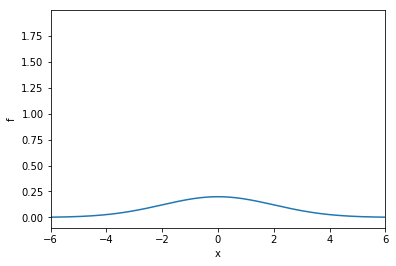

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, m, s):
    return (1.0/(np.sqrt(2*np.pi)*s))*np.exp(-0.5*((x-m)/s)**2)

m = 0;  s_start = 2;  s_stop = 0.2
s_values = np.linspace(s_start, s_stop, 30)

x = np.linspace(m -3*s_start, m + 3*s_start, 1000)
# f is max for x=m (smaller s gives larger max value)
max_f = f(m, m, s_stop)

y = f(x,m,s_stop)
lines = plt.plot(x,y)  #Returns a list of line objects!

plt.axis([x[0], x[-1], -0.1, max_f])
plt.xlabel('x')
plt.ylabel('f')

for s in s_values:
    y = f(x, m, s)
    lines[0].set_ydata(y) #update plot data and redraw
    plt.draw()
    plt.pause(0.1)

Most of the lines in this code should be familiar, but there are a few items
that are worth noting. First, we use the same `plot` function as earlier,
but in a slightly different manner. Generally, this function
does two things: it creates a plot that is ready to display on the screen by a subsequent call to `show()`,
and it returns a special Matplotlib object that represents the plot (a `Line2D` object).
In the  examples above, we did not need this object, so we did not care about it, but this time we store it
in the variable `lines`.
Note also that the `plot`-function always returns a list of such objects, representing all the curves
of the plot. In this case, we plot
only one curve, and the list has length one.
To update the plot inside the for loop, we call the `set_ydata` method of this object,
that is, `lines[0].set_ydata(y)`, every time we have computed a new `y` array.
After updating the data, we call the function `draw()` to draw the curve on the
screen. The final line inside the for loop simply makes the program stop and wait
for 0.1 seconds. If we remove this call, the movie runs too fast to be visible,
and we can obviously adjust the speed by changing the function's argument.
As a final comment on this code, remember the important message from above, that we always need to fix the
axes when creating movies; otherwise, Matplotlib will adjust the axes
automatically for each plot,
and the resulting movie will not really look like a movie at all. Here, we compute the maximum value that the
function will obtain in the line `max_f = f(m, m, s_stop)` (based on either prior
knowledge about the Gaussian function or inspection of the mathematical expression). This value is then used to set the axes
for all the plots that make up the movie.

### Second alternative: Saving image files for later processing.

This approach is very similar to the one above, but,
instead of showing the plots on the screen,
we save them to files, using the `savefig` function from Matplotlib. To avoid
having each new plot over-write the previous file, we must include a counter variable and
a formatted string to create a unique filename for each iteration of the for loop.
The complete code is nearly identical to the one above:

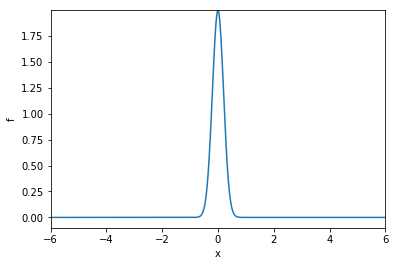

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, m, s):
    return (1.0/(np.sqrt(2*np.pi)*s))*np.exp(-0.5*((x-m)/s)**2)

m = 0;  s_start = 2;  s_stop = 0.2
s_values = np.linspace(s_start, s_stop, 30)

x = np.linspace(m -3*s_start, m + 3*s_start, 1000)
# f is max for x=m (smaller s gives larger max value)
max_f = f(m, m, s_stop)

y = f(x,m,s_stop)
lines = plt.plot(x,y)

plt.axis([x[0], x[-1], -0.1, max_f])
plt.xlabel('x')
plt.ylabel('f')

frame_counter = 0
for s in s_values:
    y = f(x, m, s)
    lines[0].set_ydata(y) #update plot data and redraw
    plt.draw()
    plt.savefig(f'tmp_{frame_counter:04d}.png') #unique filename
    frame_counter += 1

Running this program should create a number of image files, all located in
the directory in which we run the program. Converting these images into a
movie requires external software, for instance,
`convert` from the ImageMagick software suite to make animated gifs,
or `ffmpeg` or `avconv` to make MP4 and other movie formats. For instance,
if we want to create an animated gif of the
image files produced above, the following command will do the trick:

        Terminal> convert -delay 20 tmp_*.png movie.gif


The resulting gif can be played using `animate` from ImageMagick or in a browser.
Note that, for
this approach to work, one needs to be careful about the filenames. The argument `tmp_*.png` passed
to the convert function will simply replace `*` with any text, thereby sending all files with this pattern
to `convert`. The files are sent in lexicographic (i.e., alphabetical) order,
which is why we use the format specifier `04d` in the f-string above.
It would be tempting so simply write `{frame_counter}`,
with no format specifier, inside the
f-string to create the unique filename, and not worry about the format specifier. This approach would create
unique filenames such as `tmp_0.png`, `tmp_1.png`, and so on. However, we would
run into problems when creating the movie with `convert`, since, for instance,
`tmp_10.png` comes before `tmp_9.png` in the alphabetic ordering.

### Third alternative: Using built-in Matplotlib tools.

The third approach is the most advanced and flexible, and it relies on built-in
Matplotlib tools instead of the explicit for loop that we used above.
Without an explicit for loop, the actual steps of creating the animation
are less obvious, and the approach is therefore somewhat less intuitive.
The essential steps are the following:
1. Make a function to update the plot. In our case, this function should compute the new `y` array and call
   `set_ydata`, as above, to update the plot.

2. Make a list or array of the argument that changes (in this case, $s$).

3. Pass the function and the list as arguments to create a `FuncAnimation` object.

After creating this object, we can use various built-in methods to save the
movie to a file, show it on the screen, and so forth. The complete code looks
like the following:

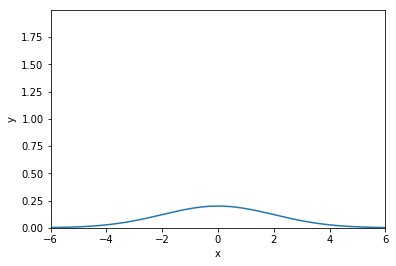

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x, m, s):
    return (1.0/(np.sqrt(2*np.pi)*s))*np.exp(-0.5*((x-m)/s)**2)

m = 0; s_start = 2; s_stop = 0.2
s_values = np.linspace(s_start,s_stop,30)

x = np.linspace(-3*s_start,3*s_start, 1000)

max_f = f(m,m,s_stop)

plt.axis([x[0],x[-1],0,max_f])
plt.xlabel('x')
plt.ylabel('y')

y = f(x,m,s_start)
lines = plt.plot(x,y) #initial plot to create the lines object

def next_frame(s):
    y = f(x, m, s)
    lines[0].set_ydata(y)
    return lines

ani = FuncAnimation(plt.gcf(), next_frame, frames=s_values, interval=100)
ani.save('movie.mp4',fps=20)
plt.show()

Most of the lines are identical to the examples above, but there are some key
differences. We define a function `next_frame` that contains all the code
that updates the plot for each frame, and returns an updated `Line2D` object.
The argument to this function should be whatever argument that is changed
for each frame (in our case, `s`). After defining this function,
we use it to create a `FuncAnimation` object in the next line:

```Python
        ani = FuncAnimation(plt.gcf(), next_frame, frames=s_values, interval=100)
```

This function call returns an object of type `FuncAnimation` .
The first argument is simply the current figure object we are working with
(`gcf` being short for *get current figure*), the next is the function
we just defined to update the frames, the third is the array of `s`-values used
to create the plots, and the last argument is the interval between frames in milliseconds.
Numerous other optional arguments to the function can be used to tune the animation. We refer to the
Matplotlib documentation for the details.
After the object is created, we call the `save` method of the `FuncAnimation` class to create a movie file,
or the usual `show()` to play it directly on the screen.


# More Useful Array Operations
At the start of this chapter we introduced the most essential operations
needed to use arrays in computations and for plotting, but NumPy arrays can do much more. Here we introduce a few additional operations that are convenient
to know about when working with arrays. First, we often need to make an array
of the same size as another array. This can
be done in several ways, for instance, using the `zeros` function introduced above,

In [28]:
import numpy as np
x = np.linspace(0,10,101)
a = np.zeros(x.shape, x.dtype)

or by copying the `x` array,

In [29]:
a = x.copy()

or by using the convenient function `zeros_like`,

In [30]:
a = np.zeros_like(x)  # zeros and same size as x

If we write a function that takes either a list or an array as an argument,
but inside the function it needs to be an array,
we can ensure that it is converted by using the function `asarray`:

In [33]:
a = np.asarray(a)

This statement will convert `a` to an array if needed (e.g., if `a` is a list or a single number), but do nothing if
`a` is already an array.

The *list slicing* that we briefly introduced in Chapter 3 also
works for arrays, and we can extract elements from an array `a` using `a[f:t:i]`.
Here, the slice `f:t:i` implies a set of indices (from, to, increment), exactly
as for lists. We can also use any list or
array of integers to index into another array:

In [34]:
a = np.linspace(1, 8, 8)
a

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [35]:
a[[1,6,7]] = 10
a

array([ 1., 10.,  3.,  4.,  5.,  6., 10., 10.])

In [36]:
a[range(2,8,3)] = -2   # same as a[2:8:3] = -2
a

array([ 1., 10., -2.,  4.,  5., -2., 10., 10.])

Finally, we can use an array of Boolean expressions to
pick out elements of an array, as demonstrated in the following example:

In [37]:
a < 0

array([False, False,  True, False, False,  True, False, False])

In [38]:
a[a < 0]           # pick out all negative elements

array([-2., -2.])

In [39]:
a[a < 0] = a.max() # if a[i]<10, set a[i]=10
a

array([ 1., 10., 10.,  4.,  5., 10., 10., 10.])

These indexing methods can often be quite useful, since, for efficiency,
we often want to avoid for loops over arrays elements. Many operations
that are naturally implemented as for loops can be replaced by creative
array slicing and indexing, with potentially substantial improvements in efficiency.

### Arrays can have any dimension.

Just as lists, arrays can have more than one index. Two-dimensional
arrays are particularly relevant, since these
are natural representations of, for instance, a table of numbers.
For instance, to represent a set of numbers such as

$$
\left\lbrack\begin{array}{cccc}
0 & 12 & -1 & 5\\
-1 & -1 & -1 & 0\\
11 & 5 & 5 & -2
\end{array}\right\rbrack
$$

it is natural to use a two-dimensional array $A_{i,j}$ with one index for the
rows and one for the columns:

$$
A =
\left\lbrack\begin{array}{ccc}
A_{0,0} & \cdots &  A_{0,n-1}\\
\vdots & \ddots &  \vdots\\
A_{m-1,0} & \cdots & A_{m-1,n-1}
\end{array}\right\rbrack
$$

In Python code, two-dimensional arrays are not much different from the
one-dimensional version, except for an extra index.
Making, filling, and modifying a two-dimensional array is done in much the
same way, as illustrated by the following example:

In [41]:
A = np.zeros((3,4))   # 3x4 table of numbers
A[0,0] = -1
A[1,0] =  1
A[2,0] = 10
A[0,1] = -5
A[2,3] = -100

# can also write (as for nested lists)
A[2][3] = -100

Notice the argument to the function `zeros`, which is a tuple specifying the number
of rows and columns in the two-dimensional array.
We can create an array of any dimension we want by passing a tuple of the correct length.
It is quite common for arrays used
in numerical computations to be *sparse*, that is, to have many zeros. It is therefore often
convenient to use `zeros` to create an array of the right size and then fill
in the nonzero values. Alternatively, we could create a nested list and convert it to
an array with the `array` function used in the beginning of the chapter.